In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Ładowanie zmiennych środowiskowych
load_dotenv()

db_host = os.getenv("DB_HOST")
db_port = os.getenv("DB_PORT")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_database = os.getenv("DB_DATABASE")

conn = (
    f"mssql+pyodbc://{db_user}:{db_password}@{db_host}:{db_port}/{db_database}"
    "?driver=ODBC+Driver+17+for+SQL+Server"
)
engine = create_engine(conn)
print("Connection successful!")

'''Depesze, Depesze_PogodaBiezaca, DaneModelTMP
'''


Connection successful!


'Depesze, Depesze_PogodaBiezaca, DaneModelTMP\n'

# 📊 Queries

In [4]:
# Mean temperature between 2000 and 2018
meantemp_to_2018 = """
SELECT
    sm.*,
    CAST(s.IDStacji AS INT) AS IDStacji,
    s.IDStacji,
    s.Nazwa,
    s.Gmina,
    s.Powiat,
    s.Wojewodztwo,
    s.Kraj,
    s.Szerokosc,
    s.Dlugosc,
    s.Wysokosc,
    s.TypStacji,
    s.KodTeryt
    --s.Lokalizacja #typ geography nie wspierany
FROM
    [SredMies2000to2018] sm
INNER JOIN
    [Stacje] s
ON
    s.IDStacji = sm.stacja
"""

# Mean temperature for 2019
meantemp_2019 = """
SELECT
    sm.*,
    CAST(s.IDStacji AS INT) AS IDStacji,
    s.IDStacji,
    s.Nazwa,
    s.Gmina,
    s.Powiat,
    s.Wojewodztwo,
    s.Kraj,
    s.Szerokosc,
    s.Dlugosc,
    s.Wysokosc,
    s.TypStacji,
    s.KodTeryt
    --s.Lokalizacja #typ geography nie wspierany
FROM
    [srednie19] sm
INNER JOIN
    [Stacje] s
ON
    s.IDStacji = sm.stacja
"""

# Mean temperature for 2022
meantemp_2022 = """
SELECT
    sm.*,
    CAST(s.IDStacji AS INT) AS IDStacji,
    s.IDStacji,
    s.Nazwa,
    s.Gmina,
    s.Powiat,
    s.Wojewodztwo,
    s.Kraj,
    s.Szerokosc,
    s.Dlugosc,
    s.Wysokosc,
    s.TypStacji,
    s.KodTeryt
    --s.Lokalizacja #typ geography nie wspierany
FROM
    [srednie22] sm
INNER JOIN
    [Stacje] s
ON
    s.IDStacji = sm.stacja
"""

# Mean temperature rom new period?
meantemp_new = """
SELECT
    sm.*,
    CAST(s.IDStacji AS INT) AS IDStacji,
    s.IDStacji,
    s.Nazwa,
    s.Gmina,
    s.Powiat,
    s.Wojewodztwo,
    s.Kraj,
    s.Szerokosc,
    s.Dlugosc,
    s.Wysokosc,
    s.TypStacji,
    s.KodTeryt
    --s.Lokalizacja #typ geography nie wspierany
FROM
    [SredMiesNew] sm
INNER JOIN
    [Stacje] s
ON
    s.IDStacji = sm.stacja
"""

In [35]:
# 2000 - 2018 - data preparation
chosen_columns = ['IDStacji', 'Miesiac', 'SredTemp']
df = pd.read_sql_query(meantemp_to_2018, engine)
print(df.duplicated().sum())
print(df.isna().sum())
print(df.isnull().sum())
filtered_df = df[chosen_columns]
print(filtered_data.shape)
filtered_data.drop_duplicates(subset=chosen_columns, inplace=True)
print(filtered_data.shape)

0
Miesiac        0
NazwaM         0
stacja         0
SredTemp       0
IDStacji       0
IDStacji       0
Nazwa          0
Gmina          0
Powiat         0
Wojewodztwo    0
Kraj           0
Szerokosc      0
Dlugosc        0
Wysokosc       0
TypStacji      0
KodTeryt       0
dtype: int64
Miesiac        0
NazwaM         0
stacja         0
SredTemp       0
IDStacji       0
IDStacji       0
Nazwa          0
Gmina          0
Powiat         0
Wojewodztwo    0
Kraj           0
Szerokosc      0
Dlugosc        0
Wysokosc       0
TypStacji      0
KodTeryt       0
dtype: int64
(977, 4)
(977, 4)


In [ ]:
'''df["Miesiac"]
miasto = pd.Series(['Warszawa'], name="Nazwa")
max_temp = df["SredTemp"].max()
miasto
max_temp
df.describe()
df
df.info()
df[df["SredTemp"] > 10]
dane_wawy = df[(df["Nazwa"].eq("Warszawa"))] | (df["Nazwa"].eq("Zakopane"))]
df.loc[df["SredTemp"] > 10, "Nazwa"].shape
df_max10 = df.sort_values(by="SredTemp", ascending=False).head(10)
df_max10
dane_wawy["SredTemp"].plot()
plt.show()'''

In [62]:


dane_wawy_sorted

,Miesiac,NazwaM,stacja,SredTemp,IDStacji,IDStacji,Nazwa,Gmina,Powiat,Wojewodztwo,Kraj,Szerokosc,Dlugosc,Wysokosc,TypStacji,KodTeryt
510,1,styczeń,12376,-2.351453,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068
501,2,luty,12376,-0.754445,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068
507,3,marzec,12376,4.748481,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068
504,4,kwiecień,12376,12.061964,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068
503,5,maj,12376,17.111070,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068
502,6,czerwiec,12376,20.357408,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068
506,7,lipiec,12376,22.937138,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068
508,8,sierpień,12376,22.168721,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068
511,9,wrzesień,12376,16.750273,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068
512,10,październik,12376,9.997074,12376,12376,Warszawa,Warszawa,Warszawa,mazowieckie,Poland,52.280957,20.961348,110,1,1465068


<Axes: xlabel='NazwaM', ylabel='SredTemp'>

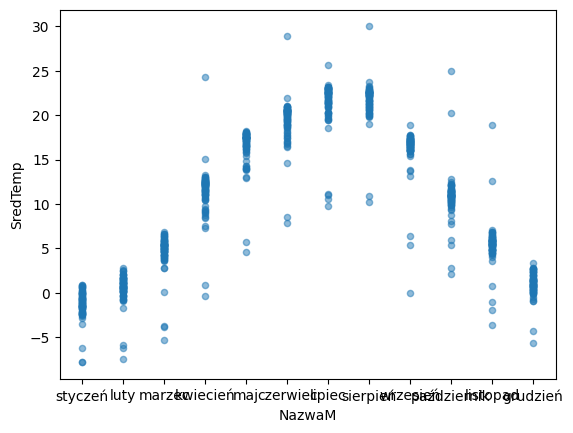

In [70]:
df_sorted = df.sort_values(by="Miesiac",ascending=True)
df_sorted.plot.scatter(x="NazwaM", y="SredTemp", alpha=0.5)